In [1]:
import matplotlib.pyplot as plt
import mplhep as hep
import json

In [2]:
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.keys())

In [3]:
with open('residuals.json') as f:
    pulls = json.load(f)

In [4]:
vbl_names = {'x':r'$x$ res. [um]', 'y':r'$y$ res. [um]', 'cotAlpha':r'$\cot\alpha$ res.', 'cotBeta':r'$\cot\beta$ res.'}

In [5]:
def draw_one_vbl(vbl, x, d, ax_ii):
    x_array = [x-0.2, x, x+0.2]
    y_array = [d[k][vbl][0] for k in d.keys()]
    yerr_array = [d[k][vbl][1] for k in d.keys()]
    
    alpha = [int(num > 0) for num in yerr_array]
    
    line = ax_ii.errorbar(x = x_array, y = y_array, yerr=yerr_array, color = colors[x], linestyle='')
    dot1 = ax_ii.scatter(x_array[0], y_array[0], marker='o', color = colors[x], alpha = alpha[0])
    dot2 = ax_ii.scatter(x_array[1], y_array[1], marker='s', color = colors[x], alpha = alpha[1])
    dot3 = ax_ii.scatter(x_array[2], y_array[2], marker='v', color = colors[x], alpha = alpha[2])
    ax_ii.set_ylabel(vbl_names[vbl])
    ax_ii.set_xticks([])

    return line, [dot1,dot2,dot3]
    
def draw_one_model(x, d, ax, slim = False):
    line, dots = draw_one_vbl('x', x, d, ax[0][0])
    line, dots = draw_one_vbl('y', x, d, ax[1][0])
    if not slim:
        line, dots = draw_one_vbl('cotAlpha', x, d, ax[0][1])
    line, dots = draw_one_vbl('cotBeta', x, d, ax[1][1])
    return line, dots


In [6]:
def format_plot(ax, n_models):
    ax[0][0].plot([-1,n_models],[0,0],color='gray', zorder=0)
    ax[1][0].plot([-1,n_models],[0,0],color='gray', zorder=0)
    ax[0][1].plot([-1,n_models],[0,0],color='gray', zorder=0)
    ax[1][1].plot([-1,n_models],[0,0],color='gray', zorder=0)

    ax[0][0].set_xlim(-1,n_models)
    ax[1][0].set_xlim(-1,n_models)
    ax[0][1].set_xlim(-1,n_models)
    ax[1][1].set_xlim(-1,n_models)

Model = max_2dconv_20t--------------
Model = full_2dconv_20t--------------
Model = max_2dconv_2t--------------
Model = full_2dconv_2t--------------
Model = full_1dconv_20t--------------
Model = full_1dconv_2t--------------
Model = full_mlp_20t--------------
Model = full_mlp_2t--------------
Model = slim_mlp_20t--------------
Model = slim_mlp_2t--------------


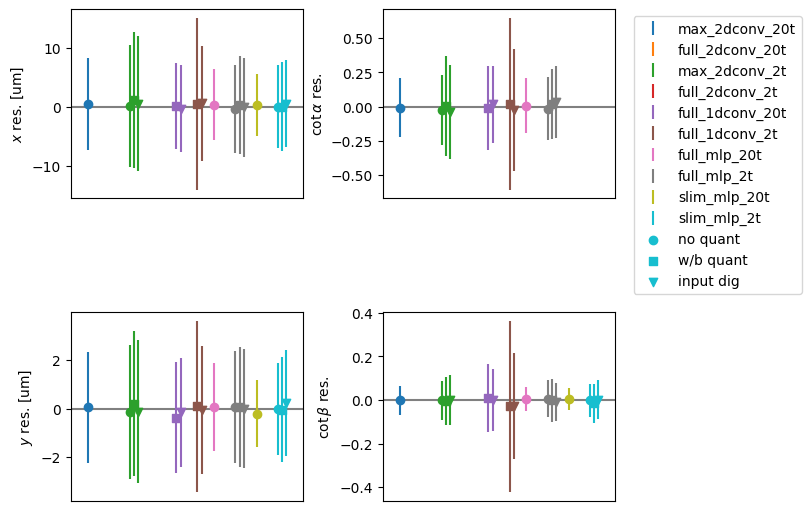

In [7]:
fig, ax = plt.subplots(2,2,figsize=(8,5),constrained_layout=True)
format_plot(ax, len(pulls.keys()))

lines = []
labels = list(pulls.keys())

for i,k1 in enumerate(labels):
    print("Model = " + k1 + "--------------")

    slim = False
    if "slim" in k1:
        slim = True
        
    line, dots = draw_one_model(i,pulls[k1],ax, slim = slim)
    lines += [line]
    
ax[0][1].legend(lines + dots,labels + ['no quant','w/b quant','input dig'], bbox_to_anchor=(1.05, 1))
plt.show()